In [1]:
import torch
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

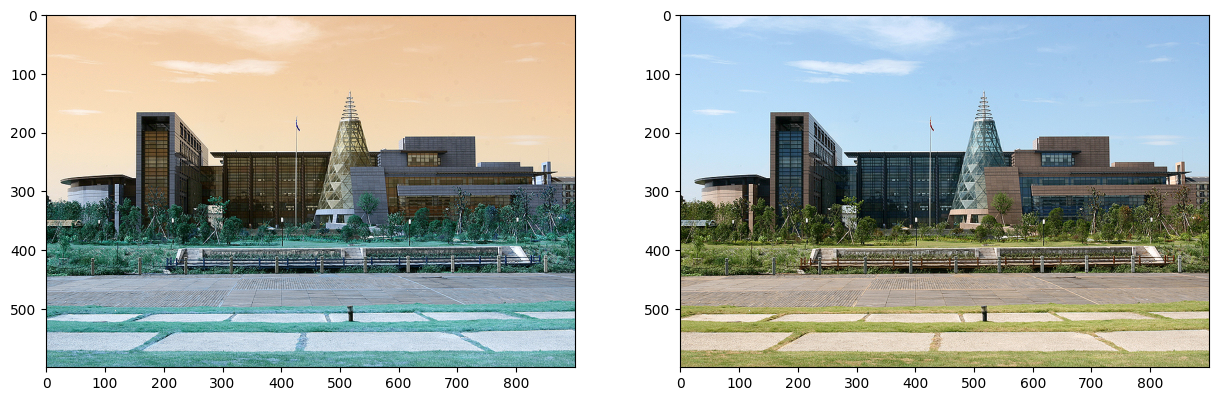

torch.Size([1, 600, 900, 3])


In [2]:
# 炒热饭操作
img = cv.imread("3.jpg")

# cv读取的图像的通道到是BGR通道，需要做BGR转RGB的操作
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(img)
axes[1].imshow(img_rgb)
plt.show()

# cv2里面的imshow和waitkey是一对好兄弟
# waitkey控制着imshow的持续时间，参数填-1的时候代表一直持续
# cv.imshow("", img)
# cv.waitKey(1)


img_rgb = np.array(img_rgb)

x = torch.from_numpy(img_rgb).float().unsqueeze(dim=0)

# 还是提醒大家tensor输入网络前一定要看一下形状
print(x.shape)

赠送知识点：为什么上图会出现这样的情况？

    + cv2.imread( ) 所读取的图像格式：每个像素为[B,G,R]的形式
    + cv2.imshow( ) 显示图像：按图像中每个像素为[B,G,R]的规则将图像显示出来
    + plt.imshow( ) 显示图像：按图像中每个像素为[R,G,B]的规则将图像显示出来

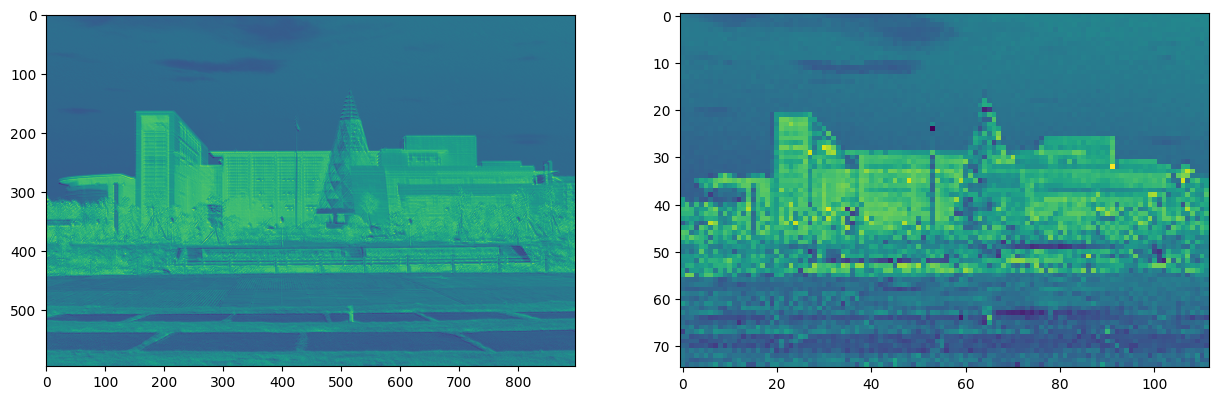

torch.Size([1, 596, 896, 1])
torch.Size([1, 75, 112, 1])


In [3]:
#测试步长 
# 若使用padding，stride=1

conv1 = torch.nn.Conv3d(in_channels=1,out_channels=1,
                        kernel_size=(5,5,3), stride=1)

conv2 = torch.nn.Conv3d(in_channels=1,out_channels=1,
                        kernel_size=(5,5,3), stride=8)

stride1_img = conv1(x)
stride4_img = conv2(x)


fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(stride1_img.detach().numpy().squeeze())
axes[1].imshow(stride4_img.detach().numpy().squeeze())
plt.show(stride4_img.shape)

print(stride1_img.shape)
print(stride4_img.shape)
